In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import pickle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import pandas as pd

In [2]:
!ls ../../predictions/AM0-27_distribution_predictions

output_statistics_test.csv output_statistics_test.pkl


In [3]:
df_path = '../../predictions/AM0-96_distribution_predictions/output_statistics_test.pkl'
df = pd.read_pickle(df_path)
ages1 = df.target_age.to_numpy()
distribution1 = df.output_label.to_numpy()
xs = []
for x in distribution1:
    x = np.exp(x)
    xs.append(x)
distribution1 = np.array(xs)
del xs
ages1p = np.matmul

In [4]:
# # distribution2 = 'male_test_age_labels_small.npy'
# ages2 = 'male_test_age_small.npy'
# # bins2 = 'bin_centers.npy'

# distribution1o = '../../../../agemapper/datasets copy/male_test_age_labels_small.npy'
# # ages1 = '../../../../agemapper/datasets copy/male_test_age_small.npy'
# bins1 = '../../../../agemapper/datasets copy/bin_centers.npy'

# distribution2 = 'male_test_age_labels_small.npy'
ages2 = 'male_test_age_small.npy'
# bins2 = 'bin_centers.npy'

distribution1o = 'male_test_age_labels_small.npy'
# ages1 = '../../../../agemapper/datasets copy/male_test_age_small.npy'
bins1 = 'bin_centers.npy'

In [5]:
# ages1 = np.load(ages1)
ages2 = np.load(ages2)
distribution1o = np.load(distribution1o)
# distribution2 = np.load(distribution2)
bins1 = np.load(bins1)
# bins2 = np.load(bins2)

ages1p = np.matmul(distribution1, bins1)

In [6]:
print(np.where(ages1 == ages1.min()))
print(np.where(ages2 == ages2.min()))

(array([881]),)
(array([881]),)


46.28984018264828


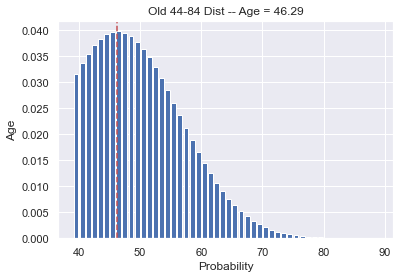

---
46.28984018264828


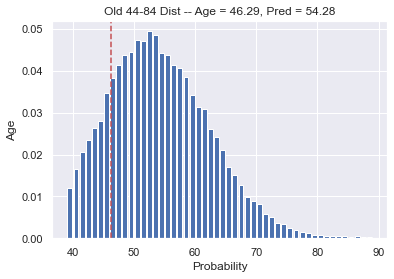

In [7]:
print(ages1[881])
plt.bar(bins1, distribution1o[881])
plt.axvline(x=ages1[881], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(ages1[881]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()
print('---')
print(ages1[881])
plt.bar(bins1, distribution1[881])
plt.axvline(x=ages1[881], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(ages1[881], ages1p[881]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()

In [8]:
print((ages1==ages2).all())

True


In [9]:
arr1inds = ages1.argsort()
ages1 = ages1[arr1inds]
ages2 = ages2[arr1inds]
distribution1 = distribution1[arr1inds]
distribution1o = distribution1o[arr1inds]
ages1p = ages1p[arr1inds]

In [10]:
ages1[np.where(ages1<=46)]

array([], dtype=float64)

In [11]:
distribution1[:2]

array([[0.01193007, 0.0164409 , 0.02058312, 0.02347426, 0.02644002,
        0.02795365, 0.03463257, 0.03819574, 0.04133937, 0.04375415,
        0.04456564, 0.0474531 , 0.04701811, 0.04946078, 0.04863892,
        0.04420468, 0.04372402, 0.04127571, 0.04057334, 0.03855443,
        0.03426769, 0.03134166, 0.03089406, 0.02613125, 0.02423544,
        0.02116738, 0.01694979, 0.01514446, 0.01260877, 0.00992224,
        0.0089503 , 0.00814931, 0.00583608, 0.00502779, 0.00364623,
        0.00336351, 0.00236614, 0.00195665, 0.00144729, 0.00137114,
        0.00086703, 0.00084982, 0.00057324, 0.00049322, 0.00045046,
        0.00046723, 0.00027102, 0.00042705, 0.00034526, 0.00026596],
       [0.01119326, 0.01411554, 0.01698853, 0.01941662, 0.02196416,
        0.02430181, 0.02746203, 0.0301355 , 0.03286391, 0.0354328 ,
        0.03698098, 0.03927299, 0.04048375, 0.04260061, 0.04303847,
        0.04216707, 0.04178246, 0.04132855, 0.04084412, 0.03940409,
        0.03710396, 0.03514504, 0.034309  , 0.0

In [12]:
distribution1[np.where(ages1<=46.5)]

array([[0.01193007, 0.0164409 , 0.02058312, 0.02347426, 0.02644002,
        0.02795365, 0.03463257, 0.03819574, 0.04133937, 0.04375415,
        0.04456564, 0.0474531 , 0.04701811, 0.04946078, 0.04863892,
        0.04420468, 0.04372402, 0.04127571, 0.04057334, 0.03855443,
        0.03426769, 0.03134166, 0.03089406, 0.02613125, 0.02423544,
        0.02116738, 0.01694979, 0.01514446, 0.01260877, 0.00992224,
        0.0089503 , 0.00814931, 0.00583608, 0.00502779, 0.00364623,
        0.00336351, 0.00236614, 0.00195665, 0.00144729, 0.00137114,
        0.00086703, 0.00084982, 0.00057324, 0.00049322, 0.00045046,
        0.00046723, 0.00027102, 0.00042705, 0.00034526, 0.00026596]],
      dtype=float32)

# Things To Look At:
- Distributions of certain subjects at the edges
- Distributions of subjects in the area of the peak (several subjects, maybe overlayed)
- Average Distributions Across Bin Ranges (every 5 years?) 
- Distributions of Several Subjects in each bin


## Distributions of certain subjects at the edges

In [13]:
print("Min Age:", ages1.min())
print("Max Age:", ages1.max())

Min Age: 46.28984018264828
Max Age: 80.66038812785382


In [14]:
ages1[:5]

array([46.28984018, 47.2670765 , 48.14139344, 48.17568493, 48.2670765 ])

In [15]:
ages1[-5:]

array([78.92956621, 79.14714612, 79.90856164, 79.91815068, 80.66038813])

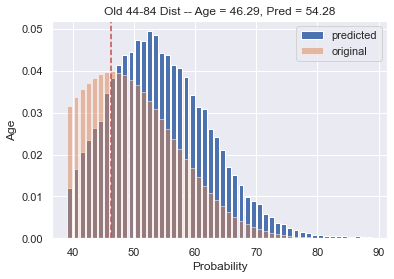

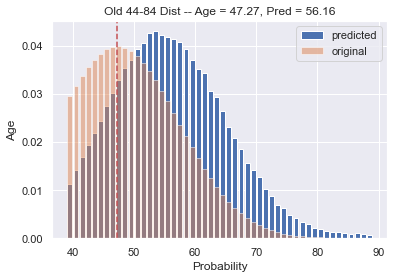

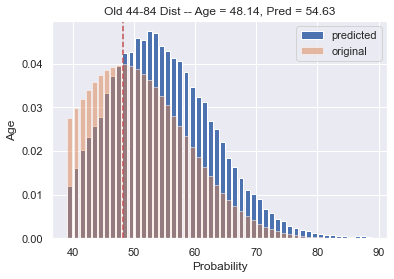

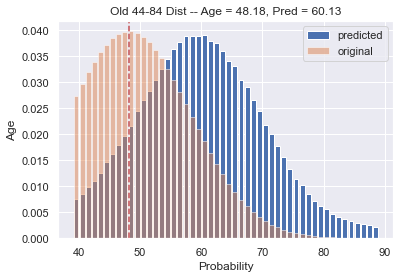

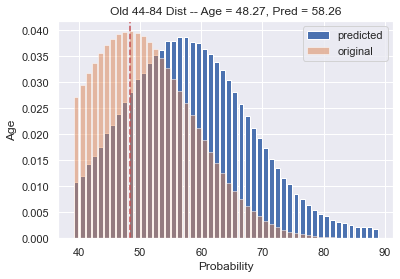

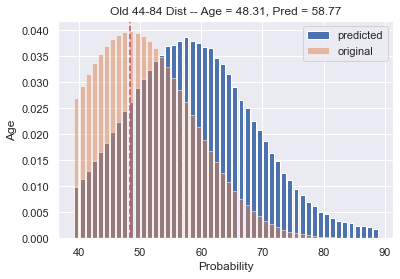

---


In [16]:
for i in [0,1,2,3,4,5]:
    plt.bar(bins1, distribution1[i], label = 'predicted')
    plt.bar(bins1, distribution1o[i], alpha=0.5, label='original')
    plt.axvline(x=ages1[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(ages1[i], ages1p[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.legend()
    plt.show()
    
print('---')

# for i in [0,1,2,3,4,5]:
#     plt.bar(bins2, distribution2[i])
#     plt.axvline(x=ages2[i], ymin=0, ymax=1, c='r', ls='--')
#     plt.title('New 39-89 Dist -- Age = {:.2f}'.format(ages2[i]))
#     plt.ylabel('Age')
#     plt.xlabel('Probability')
#     plt.show()

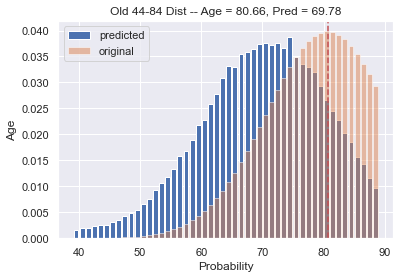

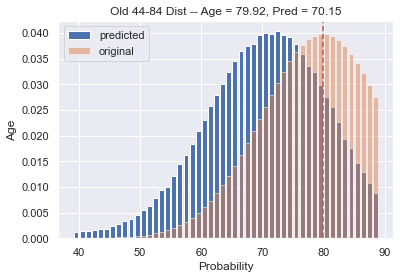

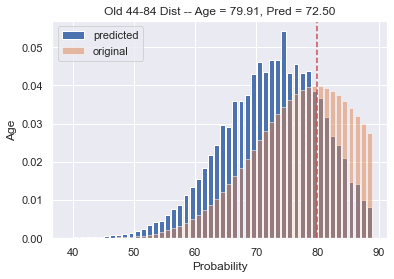

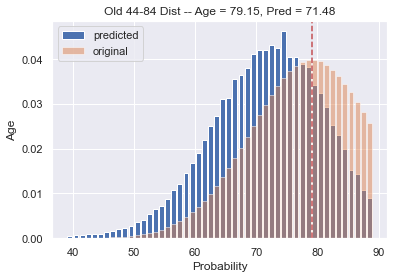

---


In [17]:
for i in [-1,-2,-3,-4]:
    plt.bar(bins1, distribution1[i], label = 'predicted')
    plt.bar(bins1, distribution1o[i], alpha=0.5, label='original')
    plt.axvline(x=ages1[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(ages1[i], ages1p[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.legend()
    plt.show()
    
print('---')

# for i in [-1,-2,-3,-4]:
#     plt.bar(bins2, distribution2[i])
#     plt.axvline(x=ages2[i], ymin=0, ymax=1, c='r', ls='--')
#     plt.title('New 39-89 Dist -- Age = {:.2f}'.format(ages2[i]))
#     plt.ylabel('Age')
#     plt.xlabel('Probability')
#     plt.show()



## Distributions of Several Subjects in each bin

In [18]:
age_bins = np.linspace(45,85,9)

In [19]:
print(len(age_bins[:-1]))

8


In [20]:
for idx, age in enumerate(age_bins[:-1]):
    age1 = ages1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    print(age1.min(), age1.max(), len(age1))
#     age2 = ages2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
#     dist2 = distribution2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]

46.28984018264828 49.8464611872148 22
50.0028538812785 54.966095890411 142
55.01769406392691 59.977739726027494 166
60.0005707762557 64.94554794520559 216
65.00239726027394 69.99646118721466 234
70.00696347031953 74.93573059360733 164
75.01381278538815 79.91815068493156 55
80.66038812785382 80.66038812785382 1


In [21]:
np.random.seed(42)

 ========= AGE RANGE: 45.0 - 50.0 ======== 


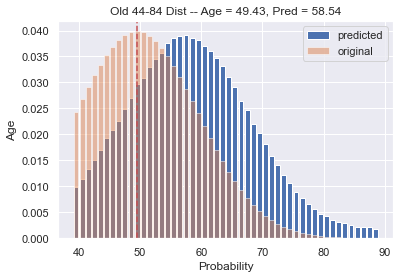

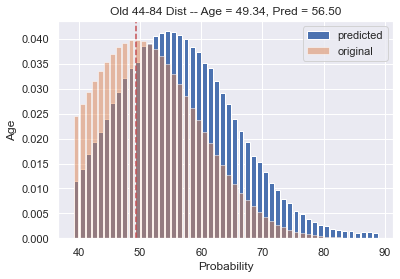

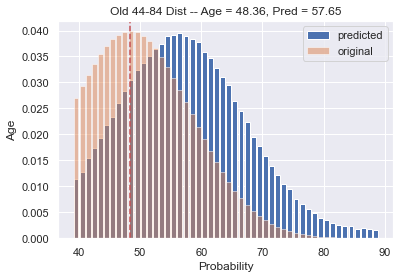

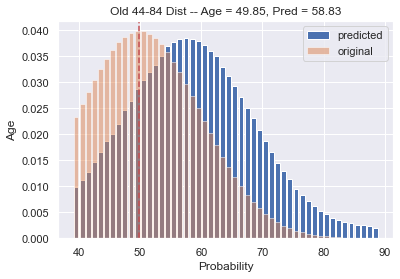

 ========= AGE RANGE: 50.0 - 55.0 ======== 


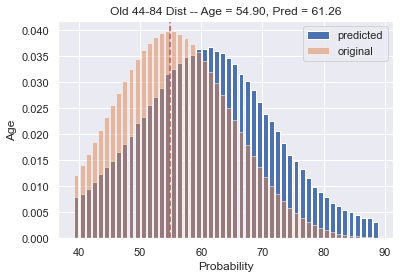

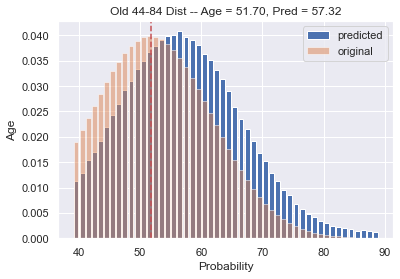

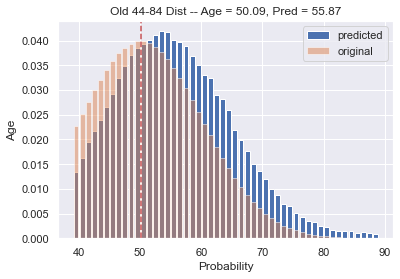

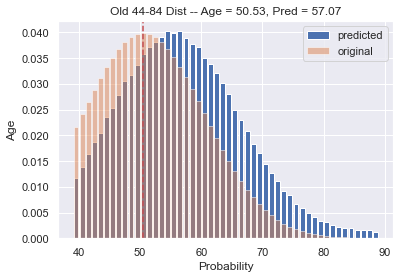

 ========= AGE RANGE: 55.0 - 60.0 ======== 


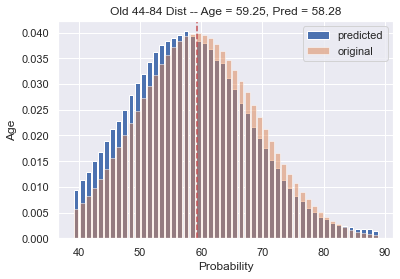

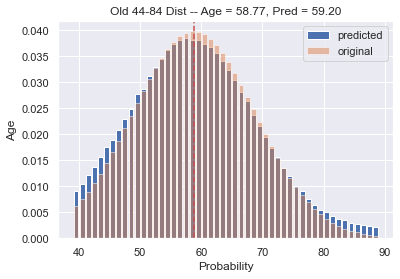

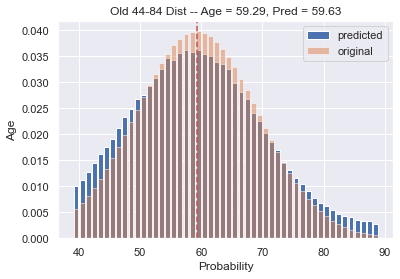

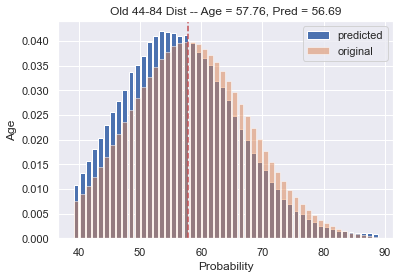

 ========= AGE RANGE: 60.0 - 65.0 ======== 


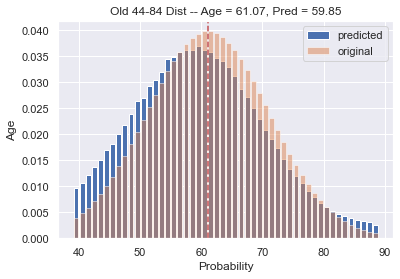

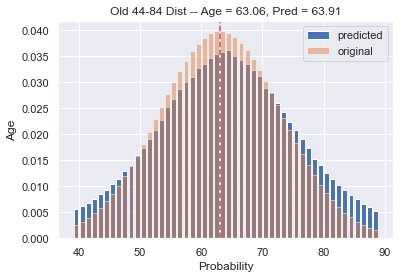

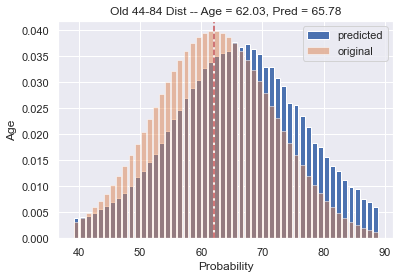

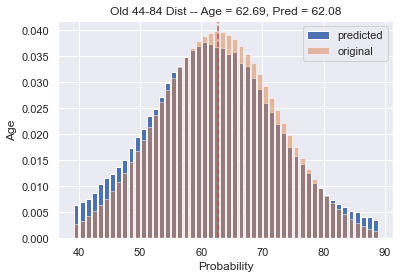

 ========= AGE RANGE: 65.0 - 70.0 ======== 


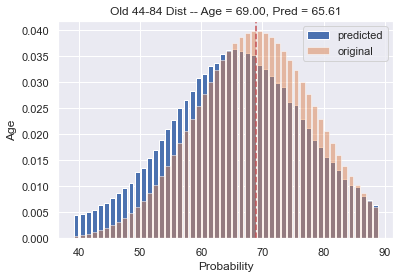

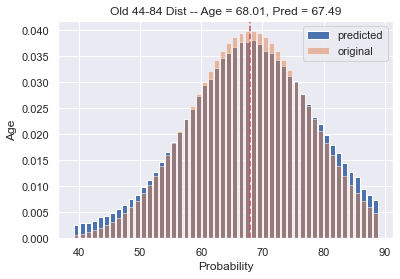

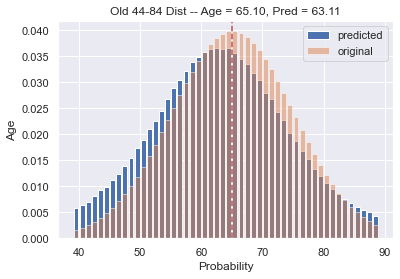

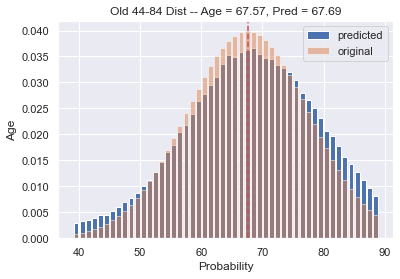

 ========= AGE RANGE: 70.0 - 75.0 ======== 


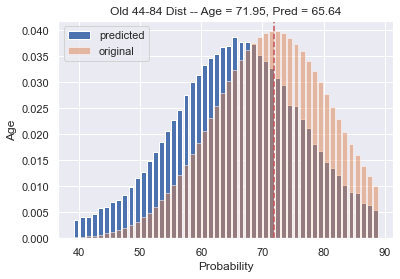

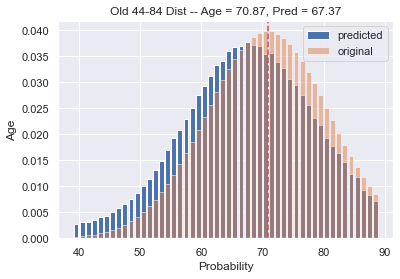

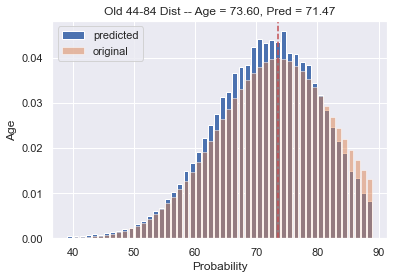

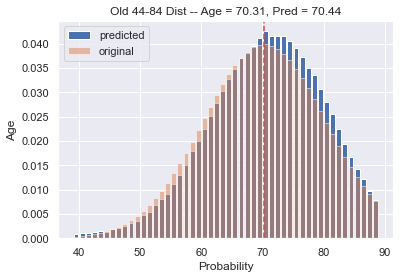

 ========= AGE RANGE: 75.0 - 80.0 ======== 


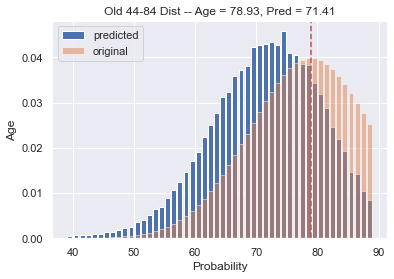

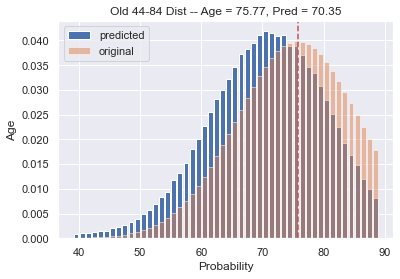

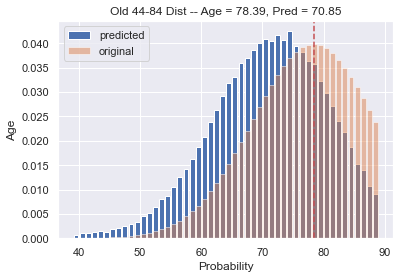

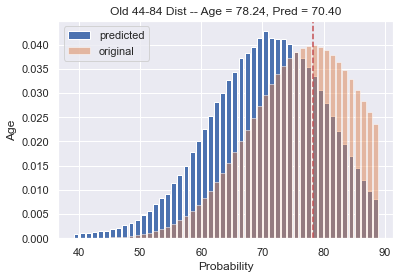

 ========= AGE RANGE: 80.0 - 85.0 ======== 


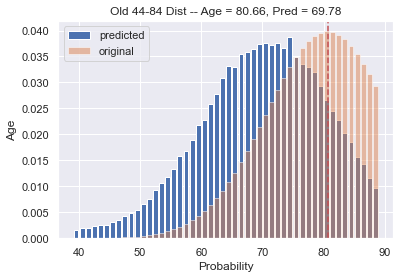

In [23]:
for idx, age in enumerate(age_bins[:-1]):
    age1 = ages1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    age1p = ages1p[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist1o = distribution1o[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    if len(age1) >= 4:
        random_subjects = np.random.choice(age1, size=4, replace=False)
    else:
        random_subjects = np.random.choice(age1, size=len(age1), replace=False)
        
    for subj in random_subjects:
        i = np.where(age1==subj)[0][0].astype(int)
        plt.bar(bins1, dist1[i], label = 'predicted')
        plt.bar(bins1, dist1o[i], alpha=0.5, label='original')
        plt.axvline(x=age1[i], ymin=0, ymax=1, c='r', ls='--')
        plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(age1[i], age1p[i]))
        plt.ylabel('Age')
        plt.xlabel('Probability')
        plt.legend()
        plt.show()
        
# for i in [0,1,2,3,4,5]:
#     plt.bar(bins1, distribution1[i], label = 'predicted')
#     plt.bar(bins1, distribution1o[i], alpha=0.5, label='original')
#     plt.axvline(x=ages1[i], ymin=0, ymax=1, c='r', ls='--')
#     plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(ages1[i], ages1p[i]))
#     plt.ylabel('Age')
#     plt.xlabel('Probability')
#     plt.legend()
#     plt.show()

## Average Distributions Across Bin Ranges (every 5 years?)

In [24]:
age_bins = np.linspace(45,85,9)
print(age_bins)

[45. 50. 55. 60. 65. 70. 75. 80. 85.]


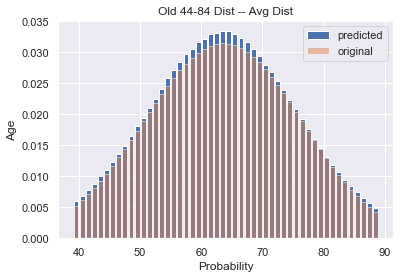

In [25]:
dist1 = distribution1.mean(axis=0)
dist1o = distribution1o.mean(axis=0)
plt.bar(bins1, dist1, label='predicted')
plt.bar(bins1, dist1o, label='original', alpha=0.5)
plt.title('Old 44-84 Dist -- Avg Dist')
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

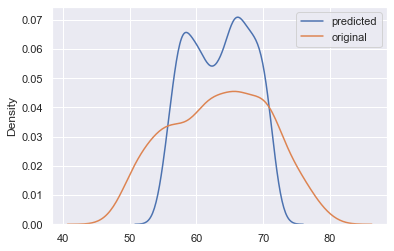

In [26]:
sns.kdeplot(ages1p, label='predicted')
sns.kdeplot(ages1, label='original')
plt.legend()

 ========= AGE RANGE: 45.0 - 50.0 ======== 


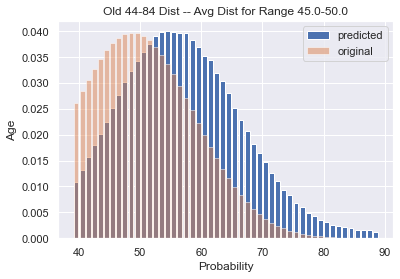

 ========= AGE RANGE: 50.0 - 55.0 ======== 


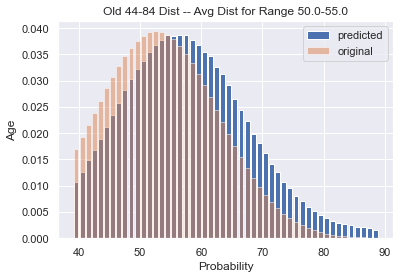

 ========= AGE RANGE: 55.0 - 60.0 ======== 


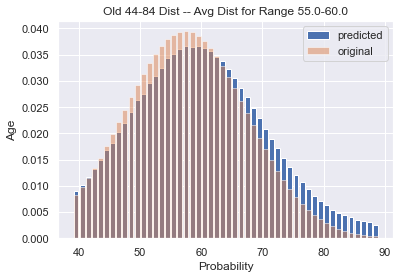

 ========= AGE RANGE: 60.0 - 65.0 ======== 


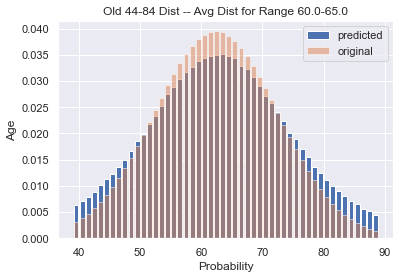

 ========= AGE RANGE: 65.0 - 70.0 ======== 


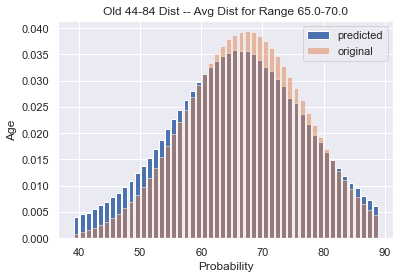

 ========= AGE RANGE: 70.0 - 75.0 ======== 


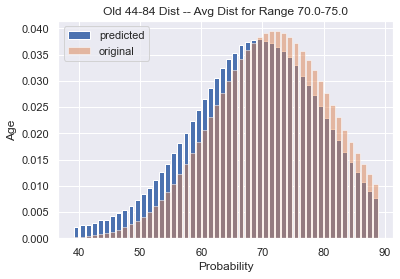

 ========= AGE RANGE: 75.0 - 80.0 ======== 


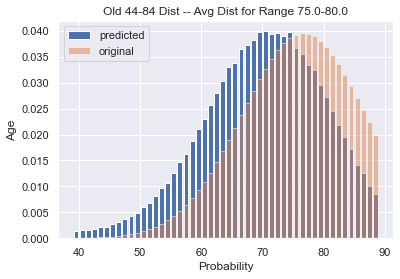

 ========= AGE RANGE: 80.0 - 85.0 ======== 


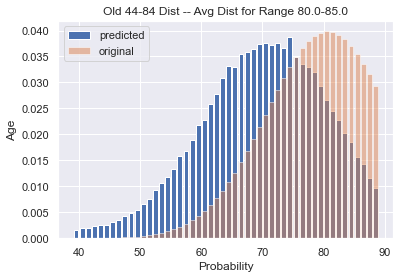

In [27]:
for idx, age in enumerate(age_bins[:-1]):
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist1o = distribution1o[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    dist1 = dist1.mean(axis=0)
    dist1o = dist1o.mean(axis=0)
    plt.bar(bins1, dist1, label='predicted')
    plt.bar(bins1, dist1o, label='original', alpha=0.5)
    plt.title('Old 44-84 Dist -- Avg Dist for Range {}-{}'.format(age_bins[idx], age_bins[idx+1]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.legend()
    plt.show()
    


## Distributions of subjects in the area of the peak (several subjects, maybe overlayed)

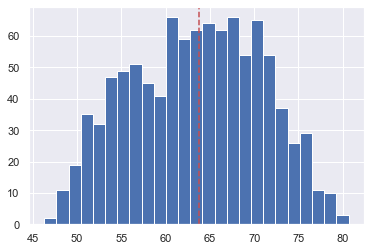

In [28]:
plt.hist(ages1, bins=25);
plt.axvline(x = ages1[499], c='r', ls='--')

In [29]:
print(ages1.mean(), np.median(ages1))

63.41777470619058 63.75819672131138


In [30]:
ages1[499]

63.75204918032773

In [31]:
elems = [490, 492, 494, 496, 498, 500, 502, 504, 506, 508]

In [32]:
len(elems)

10

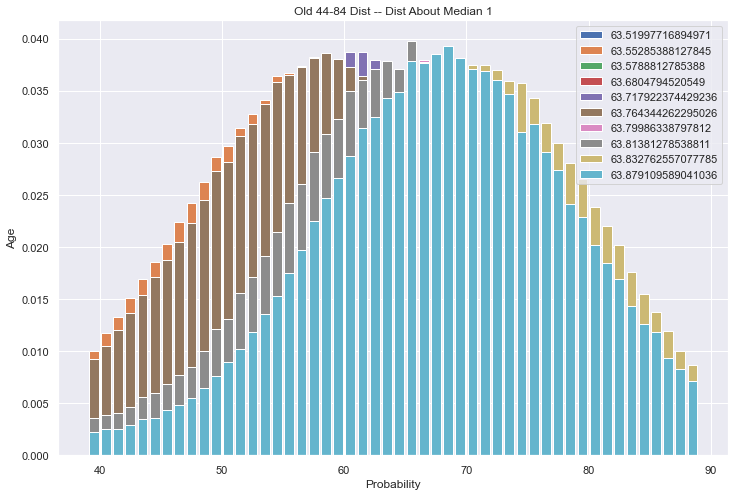

In [33]:
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]))
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

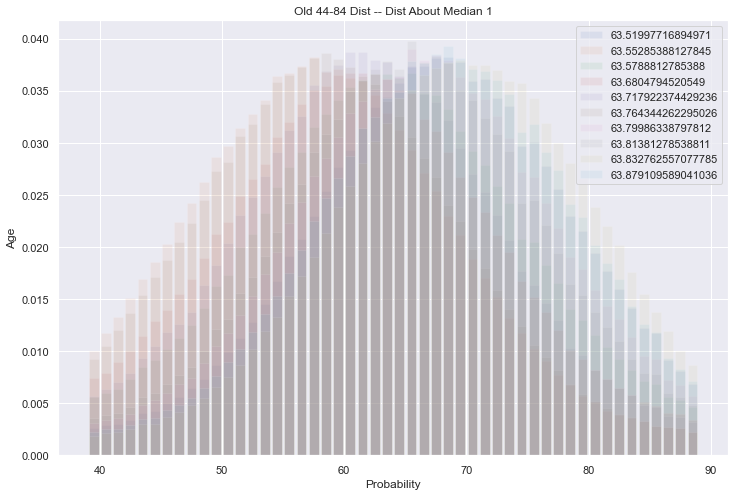

In [34]:
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

[489 491 493 495 497 500 502 504 506 509]
[63.4946347  63.52408676 63.56152968 63.65376712 63.69577626 63.76434426
 63.79986339 63.81381279 63.83276256 63.89783105]


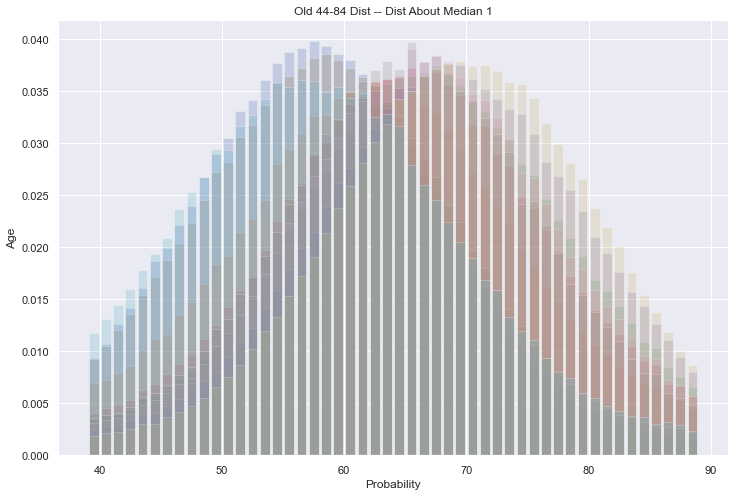

In [35]:
lims = 10
steps = 10
elems = np.linspace(499-lims, 499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.25)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[479 481 483 485 487 489 491 493 495 497 500 502 504 506 508 510 512 514
 516 519]
[63.29531963 63.31352459 63.34212329 63.37248858 63.46792237 63.4946347
 63.52408676 63.56152968 63.65376712 63.69577626 63.76434426 63.79986339
 63.81381279 63.83276256 63.87910959 63.91325137 64.03778539 64.08687215
 64.11543716 64.18778539]


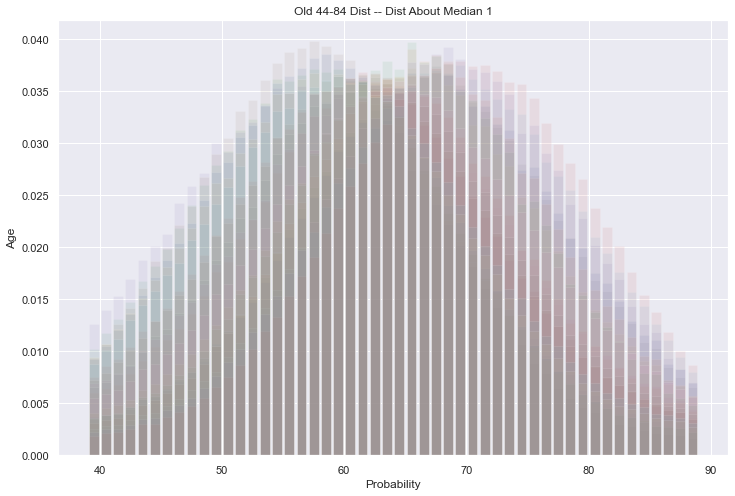

In [36]:
lims = 20
steps = 20
elems = np.linspace(499-lims, 499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[469 472 475 478 481 484 487 491 494 497 500 503 506 510 513 516 519 522
 525 529]
[63.09121005 63.1206621  63.15262557 63.24931694 63.31352459 63.34486301
 63.46792237 63.52408676 63.57888128 63.69577626 63.76434426 63.80122951
 63.83276256 63.91325137 64.07659817 64.11543716 64.18778539 64.22385845
 64.29714612 64.41906393]


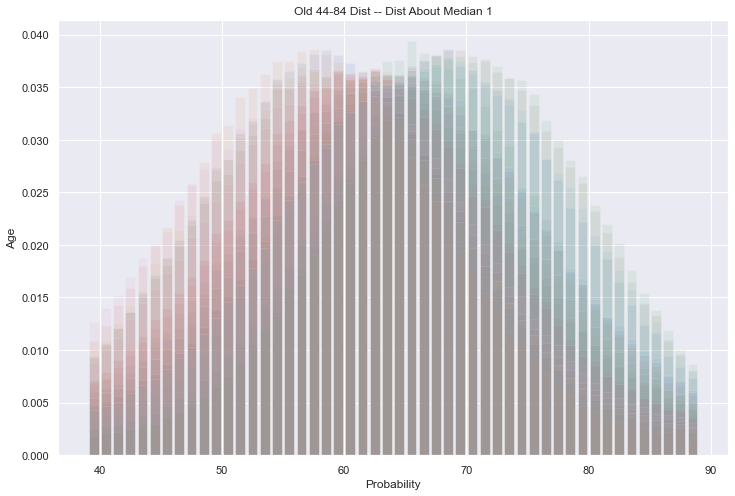

In [37]:
lims = 30
steps = 20
elems = np.linspace(499-lims, 499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[459 463 467 471 475 480 484 488 492 496 501 505 509 513 517 522 526 530
 534 539]
[62.81038813 62.94257991 63.03025114 63.11358447 63.15262557 63.31221461
 63.34486301 63.475      63.55285388 63.68047945 63.77682648 63.82294521
 63.89783105 64.07659817 64.11906393 64.22385845 64.29783105 64.45286885
 64.57248858 64.7670765 ]


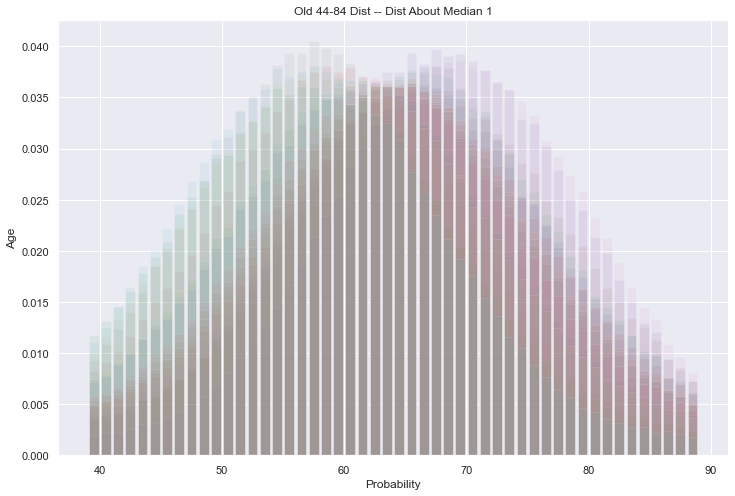

In [38]:
lims = 40
steps = 20
elems = np.linspace(499-lims, 499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[399 409 420 430 441 451 462 472 483 493 504 514 525 535 546 556 567 577
 588 599]
[61.43237705 61.63664384 62.02705479 62.2597032  62.5466895  62.68436073
 62.93824201 63.1206621  63.34212329 63.56152968 63.81381279 64.08687215
 64.29714612 64.58674863 65.00239726 65.17008197 65.36061644 65.48070776
 65.68413242 65.89600457]


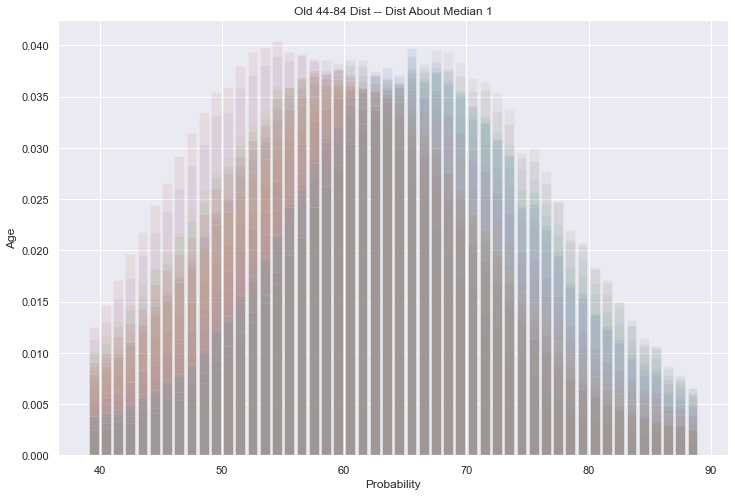

In [39]:
lims = 100
steps = 20
elems = np.linspace(499-lims, 499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[299 320 341 362 383 404 425 446 467 488 509 530 551 572 593 614 635 656
 677 699]
[59.06449772 59.40095628 60.23641553 60.80057078 61.09189498 61.56929224
 62.14349315 62.60376712 63.03025114 63.475      63.89783105 64.45286885
 65.07855191 65.43025114 65.78504566 66.27431507 66.66518265 67.1597032
 67.59280822 68.04714612]


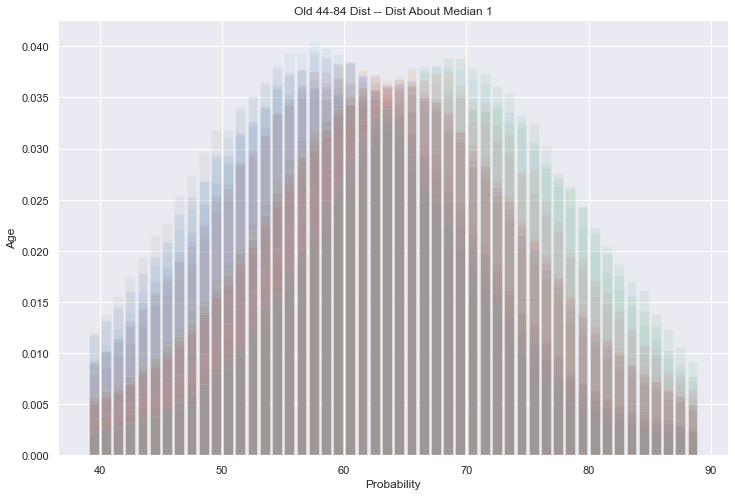

In [40]:
lims = 200
steps = 20
elems = np.linspace(499-lims, 499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()